In [1]:
import os
import pandas as pd
import time

print("🔍 1. 开始环境诊断...")

# 1. 检查文件路径
file_path = './dataset/train.csv'
if os.path.exists(file_path):
    print(f"✅ 找到文件: {file_path}")
    print(f"   文件大小: {os.path.getsize(file_path) / (1024*1024):.2f} MB")
else:
    print(f"❌ 【严重错误】找不到文件: {file_path}")
    print(f"   当前工作目录是: {os.getcwd()}")
    print("   请检查你的文件夹结构！")
    # 如果没找到文件，后面就不用跑了，直接报错停止
    raise FileNotFoundError("找不到数据集文件")

# 2. 测试读取速度 (只读前100行)
print("\n🔍 2. 测试读取 CSV...")
try:
    start = time.time()
    df_test = pd.read_csv(file_path, nrows=100)
    end = time.time()
    print(f"✅ 读取成功！耗时: {end - start:.4f} 秒")
    print(f"   数据前两列: {df_test.columns[:2].tolist()}")
except Exception as e:
    print(f"❌ 读取失败: {e}")

# 3. 测试 sklearn 是否能用
print("\n🔍 3. 测试 sklearn 库...")
try:
    from sklearn.svm import SVC
    print("✅ sklearn 导入成功")
    
    # 做一个极小的运算测试
    print("   正在进行微型训练测试...")
    X_dummy = [[0, 0], [1, 1]]
    y_dummy = [0, 1]
    clf = SVC()
    clf.fit(X_dummy, y_dummy)
    print("✅ SVM 模型功能正常")
except Exception as e:
    print(f"❌ sklearn 库有问题: {e}")

print("\n🎉 诊断结束。如果你能看到这句话，说明环境和数据都没问题！")

🔍 1. 开始环境诊断...
✅ 找到文件: ./dataset/train.csv
   文件大小: 73.22 MB

🔍 2. 测试读取 CSV...
✅ 读取成功！耗时: 0.0317 秒
   数据前两列: ['label', 'pixel0']

🔍 3. 测试 sklearn 库...
✅ sklearn 导入成功
   正在进行微型训练测试...
✅ SVM 模型功能正常

🎉 诊断结束。如果你能看到这句话，说明环境和数据都没问题！


🚀 1. 正在加载数据...
   - 训练集形状: (42000, 785)
   - 测试集形状: (28000, 784)

🚀 2. 正在进行标准化和降维 (PCA)...
   - 降维前特征数: 784
   - 降维后特征数: 320 (保留了主要特征，去除噪音)

🚀 3. 准备训练 SVM 模型...
   - 为了快速演示，仅使用前 5000 条数据进行训练
   - 开始训练 (RBF核)...
[LibSVM]
✅ 训练完成！耗时: 0.78 秒

🚀 4. 正在验证模型准确率...
✅ 验证集准确率: 93.36%
(虽然只用了少量数据，但准确率通常能达到 90% 以上！)

   - 正在绘制混淆矩阵...


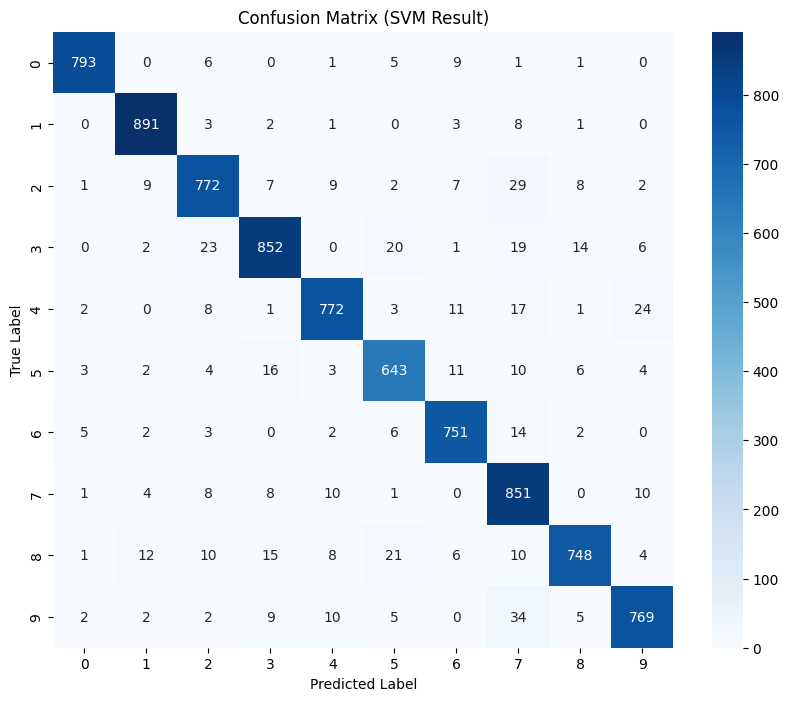


🚀 5. 生成 Kaggle 提交文件...
🎉 文件已生成: digit_submission.csv
快去目录里看看有没有生成这个文件！


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# ==========================================
# 1. 加载数据
# ==========================================
print("🚀 1. 正在加载数据...")
# 读取数据
train_df = pd.read_csv('./dataset/train.csv')
test_df = pd.read_csv('./dataset/test.csv')

# 分离标签和特征
y = train_df['label']
X = train_df.drop('label', axis=1)

print(f"   - 训练集形状: {train_df.shape}")
print(f"   - 测试集形状: {test_df.shape}")

# ==========================================
# 2. 数据预处理 (标准化 + PCA降维)
# ==========================================
print("\n🚀 2. 正在进行标准化和降维 (PCA)...")
# 标准化 (0-255 -> 0-1分布)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
test_scaled = scaler.transform(test_df)

# PCA 降维 (保留95%的信息，极大提升速度)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)
test_pca = pca.transform(test_scaled)

print(f"   - 降维前特征数: 784")
print(f"   - 降维后特征数: {X_pca.shape[1]} (保留了主要特征，去除噪音)")

# ==========================================
# 3. 划分数据集 & 训练模型 (极速版)
# ==========================================
print("\n🚀 3. 准备训练 SVM 模型...")

# 拆分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# ---【关键优化】只取前 5000 个样本训练 ---
# 如果你想跑全量数据冲高分，把下面两行注释掉即可，但要跑很久！
n_samples = 5000
X_train_subset = X_train[:n_samples]
y_train_subset = y_train[:n_samples]

print(f"   - 为了快速演示，仅使用前 {n_samples} 条数据进行训练")
print("   - 开始训练 (RBF核)...")

start_time = time.time() # 计时

# C=10: 对错误容忍度低
# verbose=True: 打印日志，让你知道它在动
model = SVC(kernel='rbf', C=10, gamma='scale', verbose=True)
model.fit(X_train_subset, y_train_subset)

end_time = time.time()
print(f"\n✅ 训练完成！耗时: {end_time - start_time:.2f} 秒")

# ==========================================
# 4. 验证与评估
# ==========================================
print("\n🚀 4. 正在验证模型准确率...")
# 预测验证集
val_preds = model.predict(X_val)
acc = accuracy_score(y_val, val_preds)

print(f"✅ 验证集准确率: {acc:.2%}")
print("(虽然只用了少量数据，但准确率通常能达到 90% 以上！)")

# 画混淆矩阵
print("\n   - 正在绘制混淆矩阵...")
cm = confusion_matrix(y_val, val_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (SVM Result)')
plt.show()

# ==========================================
# 5. 生成提交文件
# ==========================================
print("\n🚀 5. 生成 Kaggle 提交文件...")
final_preds = model.predict(test_pca)

submission = pd.DataFrame({
    'ImageId': range(1, len(final_preds) + 1),
    'Label': final_preds
})

submission.to_csv('digit_submission.csv', index=False)
print("🎉 文件已生成: digit_submission.csv")
print("快去目录里看看有没有生成这个文件！")